# Overview of 2 Different Regularization Methods in _Polynomial Regression_ and _Logistic Regression Classification_:
- ## L2 Regularization (<u>Ridge</u>)
- ## L1 Regularization (<u>Lasso</u>)

### Part 1: Vanilla Polynomial Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [4]:
# Change some default configurations
plt.rcParams['figure.figsize'] = [13, 5]   # runtime configuration
plt.style.use('ggplot')
np.random.seed(0)
np.set_printoptions(precision=3, suppress=True, sign=' ', linewidth=100)

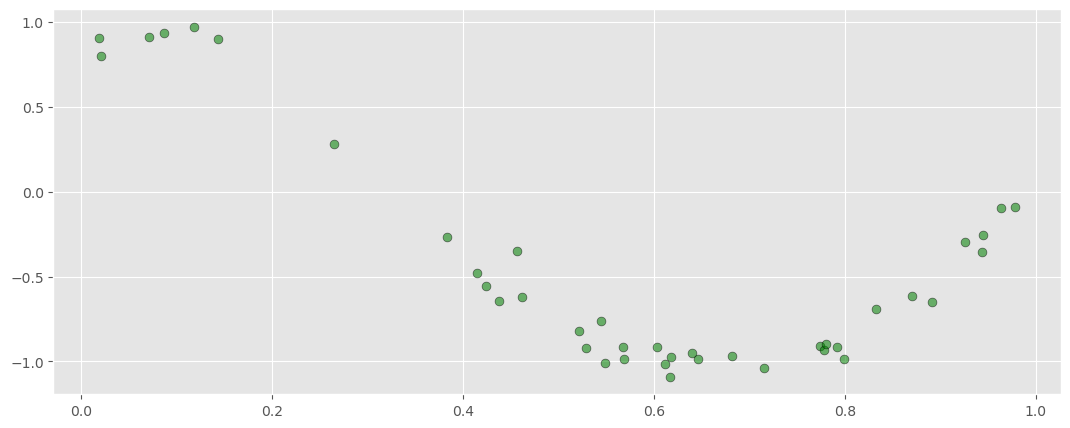

In [5]:
# Generate data

num_samples = 40

x = np.sort(np.random.rand(num_samples))
y = np.cos((1.5 * np.pi) * x) + (0.1 * np.random.randn(num_samples))    # y = cos(3/2 pi x) + (small noise)
# The regression model will try to approximate the above function with polynomail features.

# Plot data
plt.scatter(x, y, s=40, edgecolor='k', alpha=0.55, c='green')

In [6]:
# Fit Polynomial Regression to the data with various polynomial feature degrees
def fit_poly_reg(x, y, degree=1):
    """
    Fit a Polynomial Regression Model to the dataset with a specified degree.

    Parameters:
    - x: Input feature (1D array).
    - y: Target labels (1D array).
    - degree: The degree of the polynomial features to be generated (default is 1).

    Returns:
    - Fitted polynomial regression model.
    """    

    # Add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # Create and fit the model
    linear_regression = LinearRegression()
    
    model = Pipeline(steps=[('Polynomial Features', polynomial_features), ('Linear Regression', linear_regression)])
    model.fit(x[:, np.newaxis], y)        # converts 1D x to 2D x
    
    return model

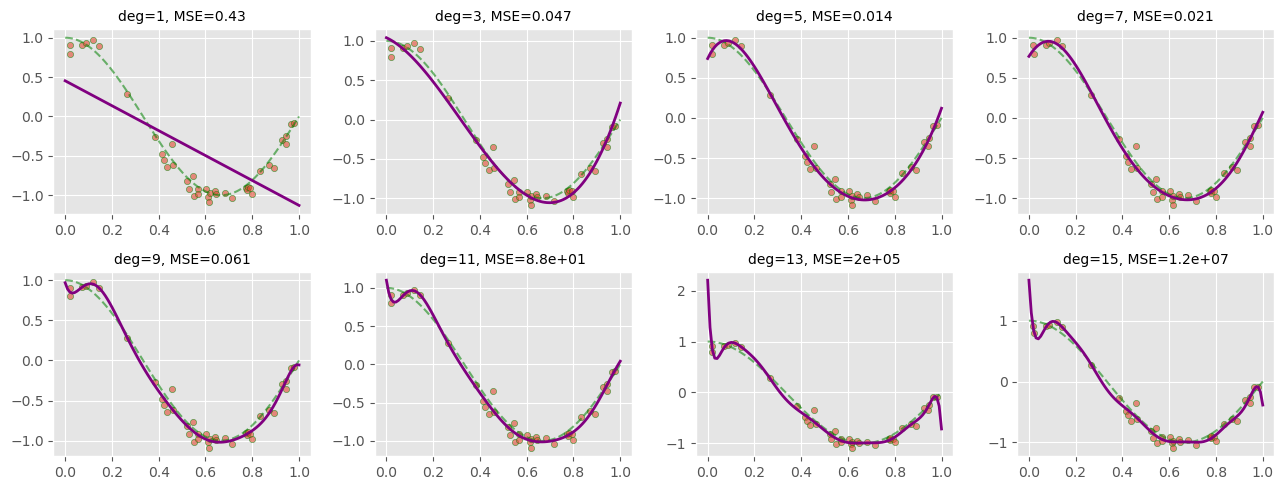

In [7]:
degrees = [1, 3, 5, 7, 9, 11, 13, 15]

x_helper = np.linspace(0, 1, 100)             # generates 100 evenely spaced numbers over 0 to 1 interval
y_helper = np.cos((1.5 * np.pi) * x_helper)   # true y_helper for x_helper

# Create plots for various degrees
for i, degree in enumerate(degrees):
    model = fit_poly_reg(x, y, degree)
    # Predict 100 evenly spaced numbers (x_helper) via trained regression model.
    y_pred = model.predict(x_helper.reshape(-1, 1))
    
    scores = cross_val_score(estimator=model, X=x[:, np.newaxis], y=y, scoring='neg_mean_squared_error', cv=10) # 10 fold cross validation

    plt.subplot(2, 4, i+1)

    plt.scatter(x, y, s=20, edgecolor='green', alpha=0.6)      # dataset samples
    plt.plot(x_helper, y_helper, 'g--', alpha=0.55)            # plot 100 ground truth points
    plt.plot(x_helper, y_pred, 'purple', linestyle='-', lw=2)                     # plot model predictions

    plt.title(f"deg={degree}, MSE={-scores.mean():.2}", fontsize=10)
plt.tight_layout()

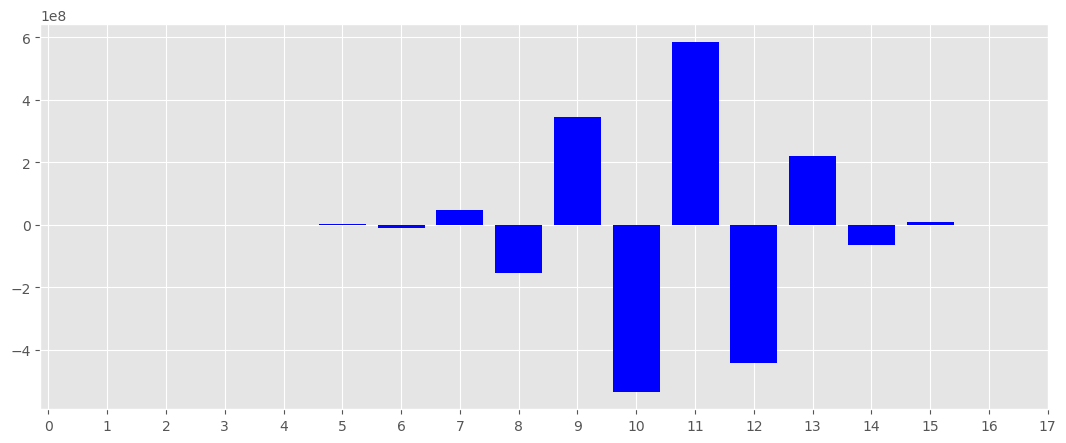

In [8]:
# It's time to plot trained polynomial weights
coefs = model.steps[1][1].coef_               # model.steps[1][1] is linear_regerssion object

plt.bar(x=range(1, len(coefs) + 1), height=coefs, color='blue')
plt.xticks(np.arange(0, 18));

### Part 2: L2 Regularization (Ridge)

In [10]:
# Define new rectified Fit Poly Regression with L2 Regularization

def fit_poly_reg_L2(x, y, degree=1, lmbda=1):
    """
    Fit a Polynomial Regression Model with L2 Regularization term to the dataset with a specified degree.

    Parameters:
    - x: Input feature (1D array).
    - y: Target labels (1D array).
    - degree: The degree of the polynomial features to be generated (default is 1).
    - lmbda: Regularization Parameter (lambda) for L2 regularization, higher values increase the regularization strength

    Returns:
    - Fitted polynomial regression model with L2 regularization .
    """ 

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = Ridge(alpha=lmbda, solver='svd')

    model = Pipeline(steps=[('Polynomial Features', polynomial_features), ('Linear Regression', linear_regression)])
    model.fit(x[:, np.newaxis], y)

    return model

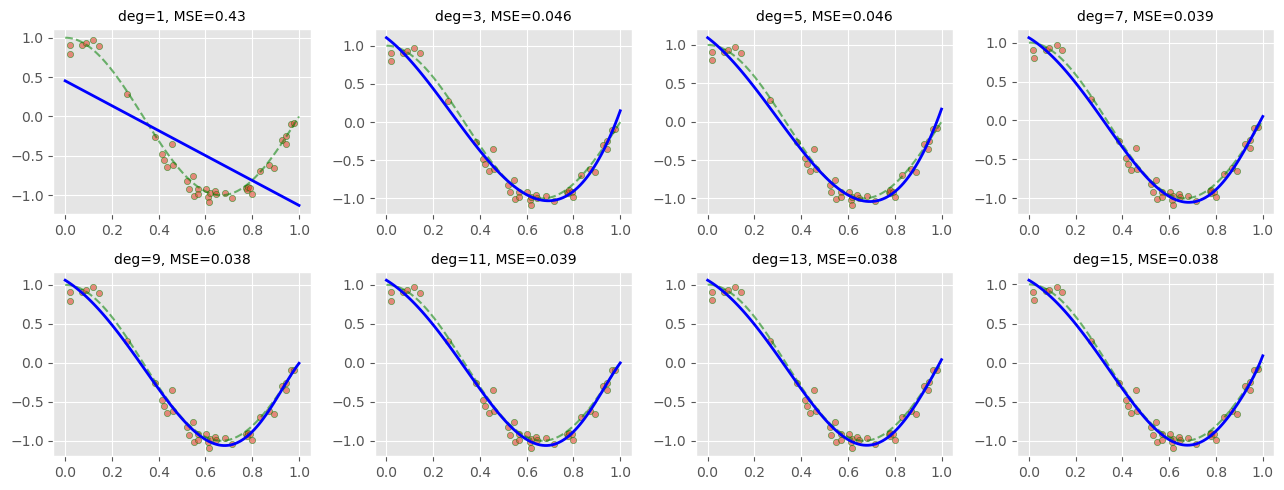

In [11]:
degrees = [1, 3, 5, 7, 9, 11, 13, 15]
lmbda = 0.001

x_helper = np.linspace(0, 1, 100)            
y_helper = np.cos((1.5 * np.pi) * x_helper)   

# Create plots for various degrees
for i, degree in enumerate(degrees):
    model = fit_poly_reg_L2(x, y, degree, lmbda)
  
    y_pred = model.predict(x_helper.reshape(-1, 1))
    
    scores = cross_val_score(estimator=model, X=x[:, np.newaxis], y=y, scoring='neg_mean_squared_error', cv=10)

    plt.subplot(2, 4, i+1)

    plt.scatter(x, y, s=20, edgecolor='green', alpha=0.6)      
    plt.plot(x_helper, y_helper, 'g--', alpha=0.55)           
    plt.plot(x_helper, y_pred, 'blue', linestyle='-', lw=2)                    

    plt.title(f"deg={degree}, MSE={-scores.mean():.2}", fontsize=10)
    
plt.tight_layout()

#### Visualize the effect of different $\lambda$ parameter

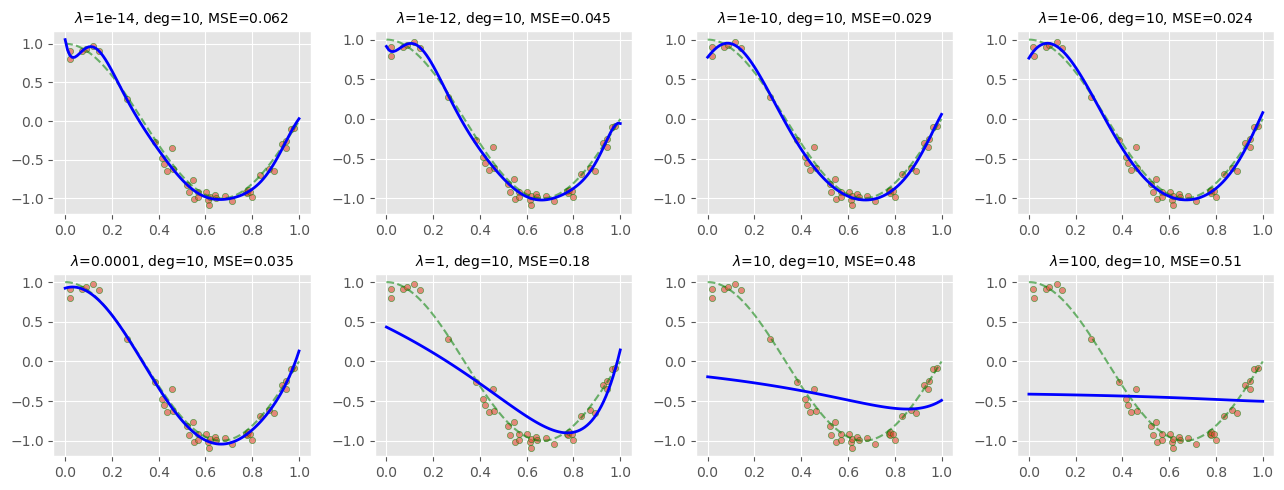

In [13]:
lmbdas = [1e-14, 1e-12, 1e-10, 1e-6, 1e-4, 1, 10, 100]
degree = 10

x_helper = np.linspace(0, 1, 100)            
y_helper = np.cos((1.5 * np.pi) * x_helper)   

for i, lmbda in enumerate(lmbdas):
    model = fit_poly_reg_L2(x, y, degree, lmbda)
  
    y_pred = model.predict(x_helper.reshape(-1, 1))
    
    scores = cross_val_score(estimator=model, X=x[:, np.newaxis], y=y, scoring='neg_mean_squared_error', cv=10)

    plt.subplot(2, 4, i+1)

    plt.scatter(x, y, s=20, edgecolor='green', alpha=0.6)      
    plt.plot(x_helper, y_helper, 'g--', alpha=0.55)           
    plt.plot(x_helper, y_pred, 'blue', linestyle='-', lw=2)                    

    plt.title(rf"$\lambda$={lmbda}, deg={degree}, MSE={-scores.mean():.2}", fontsize=10)
plt.tight_layout()

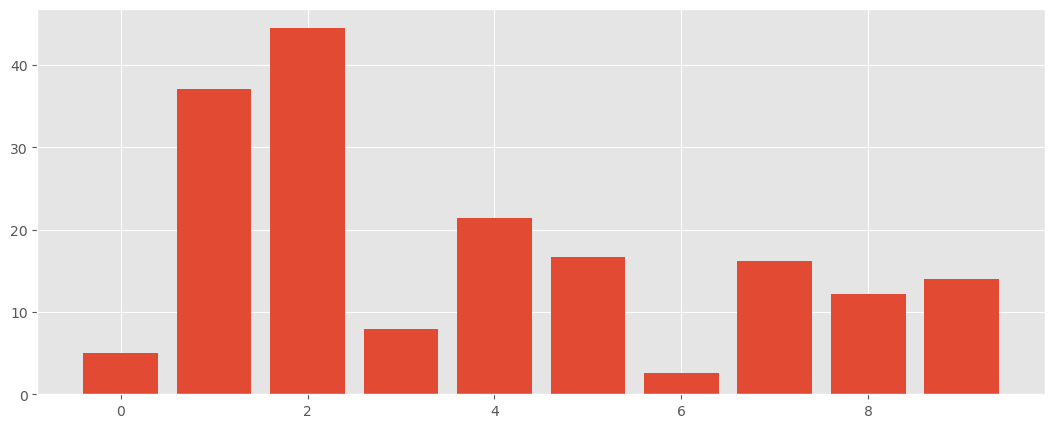

In [14]:
model = fit_poly_reg_L2(x, y, degree=10, lmbda=1e-6)

plt.bar(x=np.arange(10), height=np.abs(model.steps[1][1].coef_));

### Part 3: L1 Regularization (Lasso)

In [16]:
# Define new rectified Fit Poly Regression with L1 Regularization (Lasso)
def fit_poly_reg_L1(x, y, degree=1, lmbda=1):
    """
    Fit a Polynomial Regression Model with L1 Regularization term to the dataset with a specified degree.

    Parameters:
    - x: Input feature (1D array).
    - y: Target labels (1D array).
    - degree: The degree of the polynomial features to be generated (default is 1).
    - lmbda: Regularization Parameter (lambda) for L1 regularization, higher values increase the regularization strength

    Returns:
    - Fitted polynomial regression model with L1 regularization .
    """ 

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    ####################Lasso###########################
    linear_regression = Lasso(alpha=lmbda, max_iter=10000) 

    model = Pipeline(steps=[('Polynomial Features', polynomial_features), ('Linear Regression', linear_regression)])
    model.fit(x[:, np.newaxis], y)

    return model

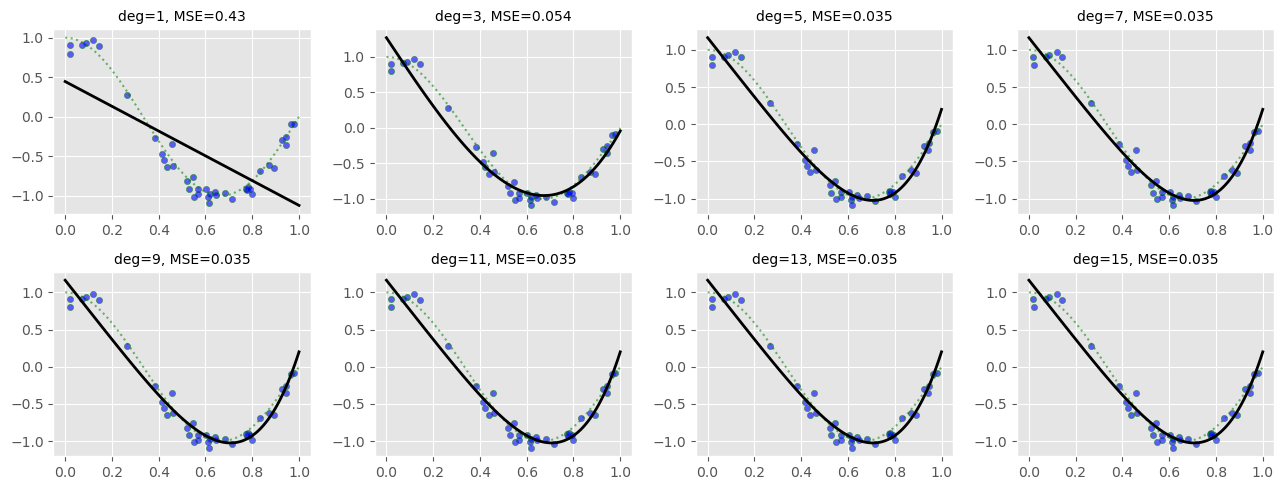

In [17]:
# Ploting with different degrees
degrees = [1, 3, 5, 7, 9, 11, 13, 15]
lmbda = 0.001

x_helper = np.linspace(0, 1, 100)            
y_helper = np.cos((1.5 * np.pi) * x_helper)   

# Create plots for various degrees
for i, degree in enumerate(degrees):
    model = fit_poly_reg_L1(x, y, degree, lmbda)
  
    y_pred = model.predict(x_helper.reshape(-1, 1))
    
    scores = cross_val_score(estimator=model, X=x[:, np.newaxis], y=y, scoring='neg_mean_squared_error', cv=10)

    plt.subplot(2, 4, i+1)

    plt.scatter(x, y, s=20, edgecolor='green', alpha=0.6, c='b')      
    plt.plot(x_helper, y_helper, 'g:', alpha=0.55)           
    plt.plot(x_helper, y_pred, 'black', linestyle='-', lw=2)                    

    plt.title(f"deg={degree}, MSE={-scores.mean():.2}", fontsize=10)
    
plt.tight_layout()

<BarContainer object of 15 artists>

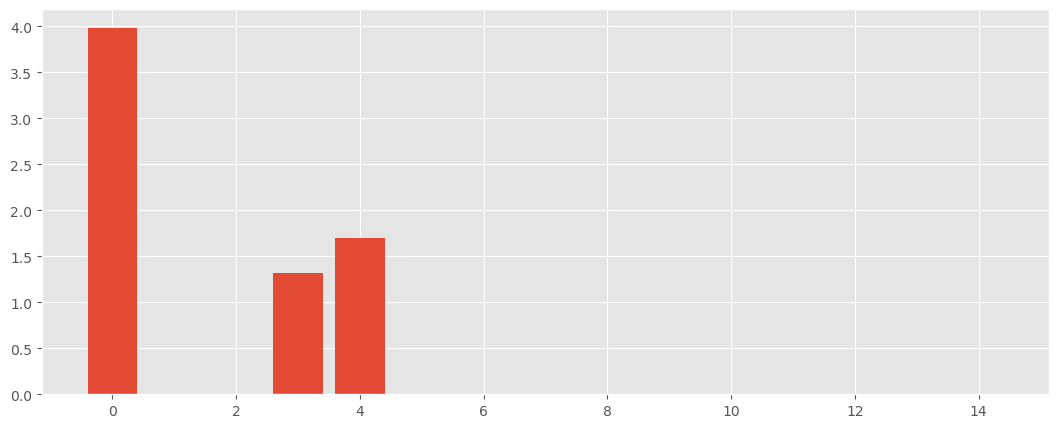

In [18]:

# Plot coefficients
plt.bar(x=range(15), height=np.abs(model.steps[1][1].coef_))
# As it's evident, most weights are set to 0

### Part 4: Classification with Regularization

In [20]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

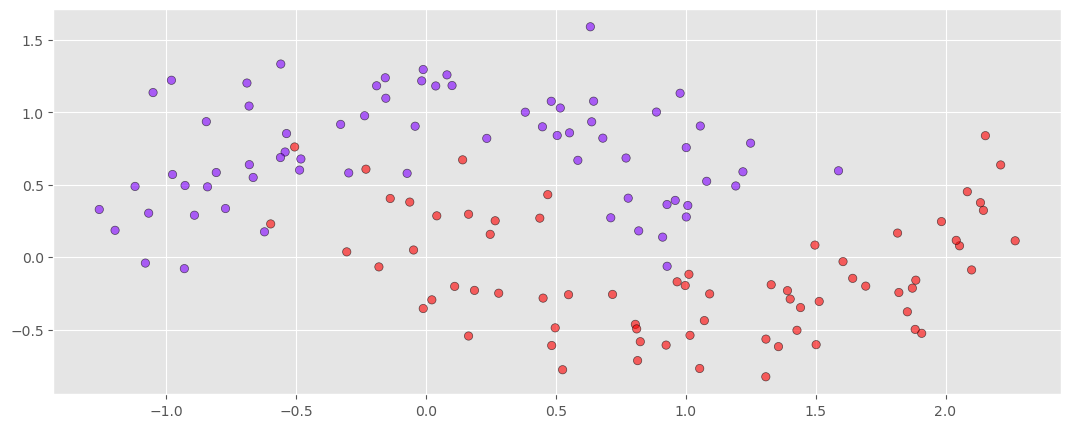

In [21]:
X, y = make_moons(n_samples=140, noise=0.25, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, cmap='rainbow', edgecolors='black');

In [22]:
# A function that shows classification boundries
def plot_2d_separator(classifier, X):
    eps = X.std() / 2     # ensures that the plot won't cut off the boundary region

    # Determine boundaries
    x_min = X[:, 0].min() - eps
    x_max = X[:, 0].max() + eps
    y_min = X[:, 1].min() - eps
    y_max = X[:, 1].max() + eps

    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.flatten(), X2.flatten()]

    try:                   
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [0.5]
        fill_levels = [0, 0.5, 1]


    ax = plt.gca()
    ax.contourf(X1, X2, decision_values.reshape(X1.shape),
               levels=fill_levels, colors=['purple', 'red'], alpha=0.2)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

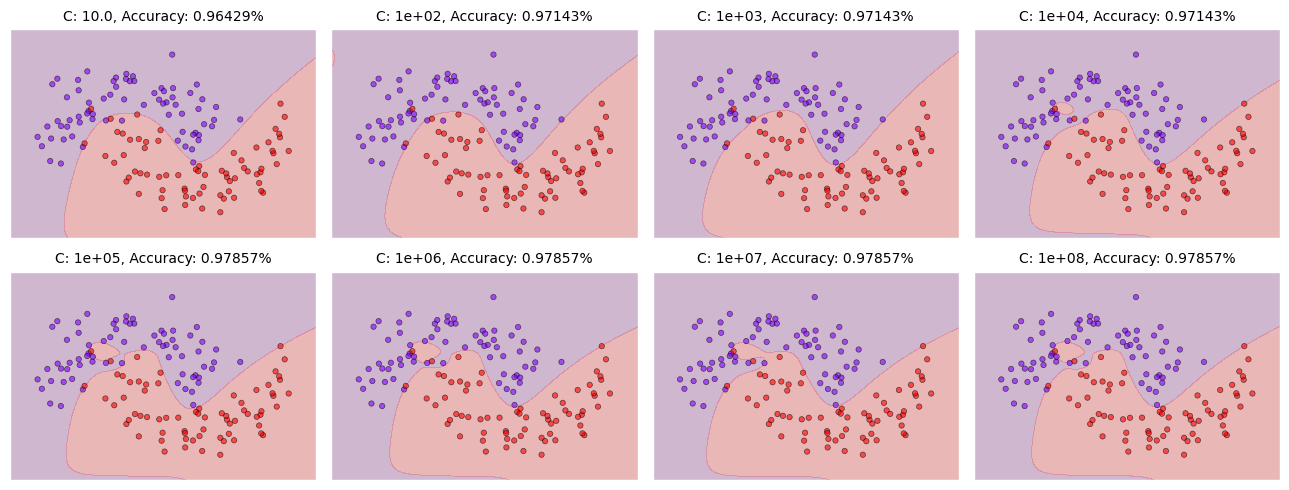

In [23]:
# Logistic Regression Classifier and Plotting

poly_degree = 8
# Various regularization parameters for plotting
C_list = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]

for i, C in enumerate(C_list):
    plt.subplot(2, 4, i+1)

    poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
    log_reg = LogisticRegression(C=C)    # Logistic Regression with specified regularization term, C

    model = Pipeline([("Polynomial Features", poly_features), ("Logistic Regression", log_reg)])

    model.fit(X, y)
    accuracy = model.score(X, y)

    plt.title(f"C: {C:.3}, Accuracy: {accuracy:.5}%", fontsize=10)
    plot_2d_separator(model, X)
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, alpha=0.6, edgecolors='black', cmap='rainbow')
    


plt.tight_layout();